# Balanced spiking model
## Implemented (with slight variations) as repoted in Litwin-Kumar & Doiron, 2012

#### Taku Ito
#### 07/09/2019

In [2]:
import numpy as np
import model3 as model
from importlib import reload
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import convolve2d
%matplotlib inline
import numpy.matlib as matlib
from statsmodels.distributions.empirical_distribution import ECDF
import time as timepkg

#### Construct model, set parameters and synaptic efficacies

In [3]:
model = reload(model)

# Dynamic parameters
tau_e  = 15.0
tau_i = 10.0
ref_e = 5.0
ref_i = 5.0


# Construct network and synaptic connections
nE = int(4000)
nI = int(1000)
n_clusters = 50
# Connectivity probabilities
pEE = .2
pEI = .5 
pIE = .5
pII = .5
rEE = 2.5 # Clustering coef
K = nE*pEE # Average number of E-E connections
# Synaptic efficacies
jEE_out = 10.0 / (tau_e * np.sqrt(K))
jEE_in = 1.9 * 10.0 / (tau_e * np.sqrt(K))
jEI = 4.0 / (np.sqrt(K) * tau_i)
jIE = -16.0 * 1.2 / (tau_e * np.sqrt(K))
jII = -16.0 / (tau_i * np.sqrt(K))

wEE, wEI, wIE, wII = model.constructConnMatrices(nE=nE, nI=nI, n_clusters=n_clusters,
                                                 pEE=pEE, pEI=pEI, pIE=pIE, pII=pII, rEE=rEE, 
                                                 jEE_out=jEE_out, jEE_in=jEE_in, jEI=jEI, jIE=jIE, jII=jII)

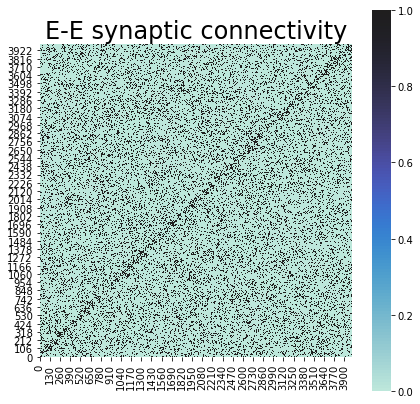

In [4]:
plt.figure(figsize=(7,7))
mat = wEE>0
mat2 = np.zeros(mat.shape)
mat2[mat] = 1.0
ax = sns.heatmap(mat2,square=True,center=True, cbar={'frac':0.046});
ax.invert_yaxis();
plt.title('E-E synaptic connectivity', fontsize=24);

#### Simulate spiking model

In [30]:
model = reload(model)

timestart=timepkg.time()
time = 2000
dt = .1
T = np.arange(0,time,dt)

stim_e = np.zeros((nE,))
stim_i = np.zeros((nI,))
out = model.spikingModel(wEE, wEI, wIE, wII, stim_e, stim_i,
                         time=time, dt=dt)
spkE_spont, spkI_spont, Ie_spont, Ii_spont, timesE, timesI, ne_s, ni_s = out
timeend = timepkg.time()
print('Elapsed time:', timeend-timestart)

Elapsed time: 566.3475515842438


In [31]:
print('Mean rate E-population:', np.mean(np.sum(spkE_spont,1)))
print('Mean rate I-population:', np.mean(np.sum(spkI_spont,1)))

Mean rate E-population: 6.9525
Mean rate I-population: 8.868


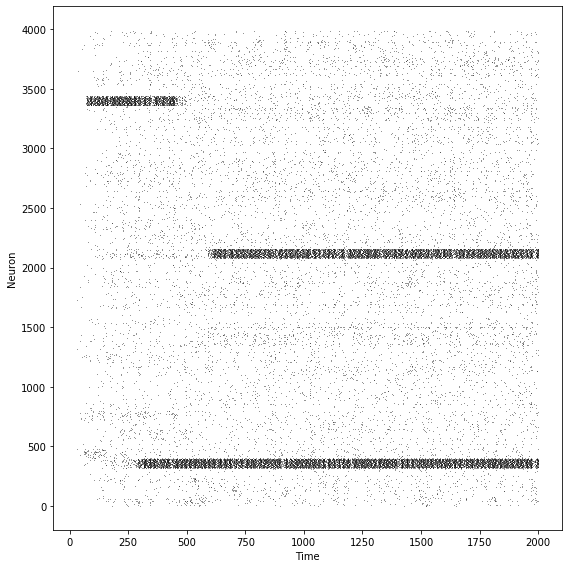

In [32]:
plt.figure(figsize=(8,8))
for ci in range(nE):
    vals = timesE[ci,1:ne_s[ci]]
    y = ci*np.ones((len(vals),))
    plt.scatter(vals,y,s=.3,c="k",marker="o",linewidths=0)

plt.ylabel("Neuron")
plt.xlabel("Time")
plt.tight_layout()
# plt.savefig("imshow.png",dpi=150)

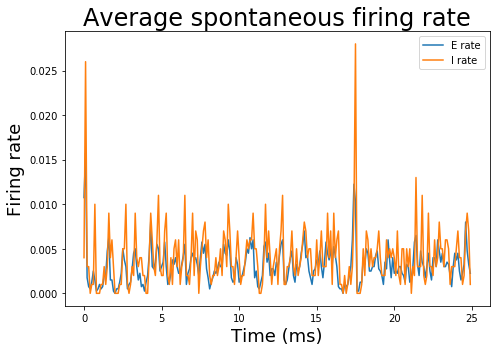

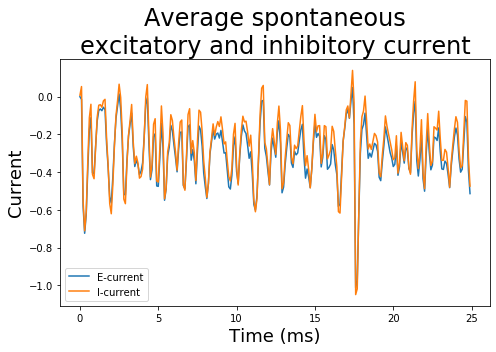

In [33]:
timestart = 0
timeend = 250
plt.figure(figsize=(7,5))
plt.title('Average spontaneous firing rate',fontsize=24)
plt.plot(T[timestart:timeend],np.mean(spkE_spont[:,timestart:timeend],axis=0),label='E rate')
plt.plot(T[timestart:timeend],np.mean(spkI_spont[:,timestart:timeend],axis=0),label='I rate')
plt.xlabel('Time (ms)',fontsize=18)
plt.ylabel('Firing rate',fontsize=18)
plt.legend()
plt.tight_layout()


plt.figure(figsize=(7,5))
plt.title('Average spontaneous\nexcitatory and inhibitory current',fontsize=24)
plt.plot(T[timestart:timeend],np.mean(Ie_spont[:,timestart:timeend],axis=0),label='E-current');
plt.plot(T[timestart:timeend],np.mean(Ii_spont[:,timestart:timeend],axis=0),label='I-current');
plt.xlabel('Time (ms)',fontsize=18)
plt.ylabel('Current',fontsize=18)
plt.legend()
plt.tight_layout()

# Run with stimulation in first two clusters

In [21]:
model = reload(model)

timestart = timepkg.time()
time = 2000
dt = .1
T = np.arange(0,time,dt)

stim_e = np.zeros((nE,))
stim_i = np.zeros((nI,))
stim_e[:n_clusters*2] = 0.07
out = model.spikingModel(wEE, wEI, wIE, wII, stim_e, stim_i,
                         time=time, dt=dt)
spkE_stim, spkI_stim, Ie_stim, Ii_stim, timesE_stim, timesI_stim, ne_s_stim, ni_s_stim = out

timeend = timepkg.time()
print('Elapsed time:', timeend-timestart)


Elapsed time: 559.057341337204


In [25]:
print('Mean rate E-population:', np.mean(np.sum(spkE_stim,1)))
print('Mean rate I-population:', np.mean(np.sum(spkI_stim,1)))

Mean rate E-population: 7.0925
Mean rate I-population: 9.024


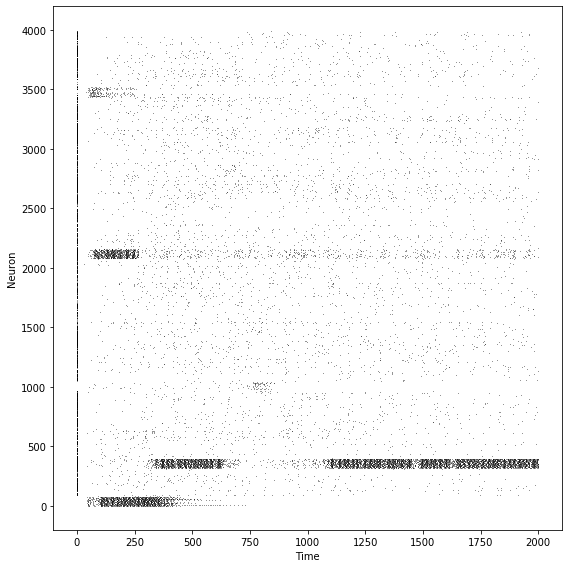

In [26]:
plt.figure(figsize=(8,8))
for ci in range(nE):
    vals = timesE_stim[ci,1:ne_s[ci]]
    y = ci*np.ones((len(vals),))
    plt.scatter(vals,y,s=.3,c="k",marker="o",linewidths=0)

plt.ylabel("Neuron")
plt.xlabel("Time")
plt.tight_layout()
# plt.savefig("imshow.png",dpi=150)

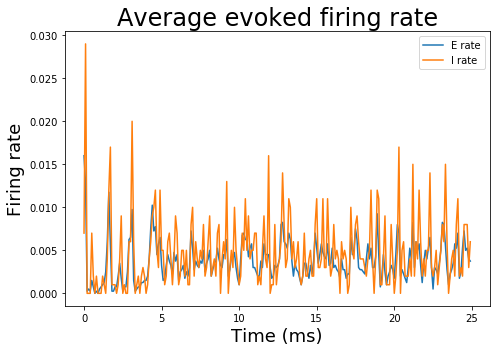

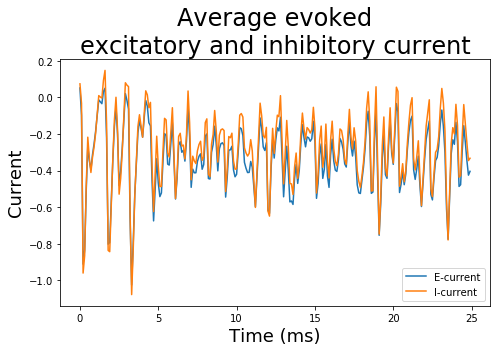

In [27]:
timestart = 0
timeend = 250
plt.figure(figsize=(7,5))
plt.title('Average evoked firing rate',fontsize=24)
plt.plot(T[timestart:timeend],np.mean(spkE_stim[:,timestart:timeend],axis=0),label='E rate')
plt.plot(T[timestart:timeend],np.mean(spkI_stim[:,timestart:timeend],axis=0),label='I rate')
plt.xlabel('Time (ms)',fontsize=18)
plt.ylabel('Firing rate',fontsize=18)
plt.legend()
plt.tight_layout()


plt.figure(figsize=(7,5))
plt.title('Average evoked\nexcitatory and inhibitory current',fontsize=24)
plt.plot(T[timestart:timeend],np.mean(Ie_stim[:,timestart:timeend],axis=0),label='E-current');
plt.plot(T[timestart:timeend],np.mean(Ii_stim[:,timestart:timeend],axis=0),label='I-current');
plt.xlabel('Time (ms)',fontsize=18)
plt.ylabel('Current',fontsize=18)
plt.legend()
plt.tight_layout()

# Plot excitatory mean firing rate vs. excitatory mean input

Text(0, 0.5, 'E firing rate')

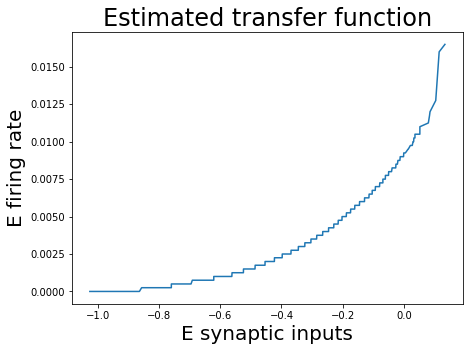

In [28]:
synE_spont_mean = np.mean(Ie_spont,axis=0)
frE_spont_mean = np.mean(spkE_spont,axis=0)

synE_stim_mean = np.mean(Ie_stim,axis=0)
frE_stim_mean = np.mean(spkE_stim,axis=0)

synE_mean = np.hstack((synE_spont_mean,synE_stim_mean))
frE_mean = np.hstack((frE_spont_mean,frE_stim_mean))

# Sort inputs
input_ind_sorted = sorted(range(len(synE_mean)), key=lambda k: synE_mean[k])

plt.figure(figsize=(7,5))
plt.title('Estimated transfer function', fontsize=24)
# plt.plot(synE_mean[input_ind_sorted],frE_mean[input_ind_sorted])
plt.plot(np.sort(synE_mean),np.sort(frE_mean))
plt.xlabel('E synaptic inputs',fontsize=20)
plt.ylabel('E firing rate',fontsize=20)


Text(0.5, 1.0, 'Distribution of firing rate')

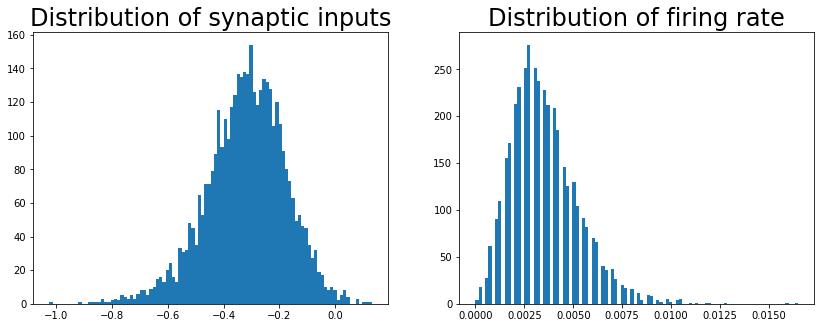

In [29]:
plt.figure(figsize=(14,5))
plt.subplot(121)
plt.hist(synE_mean,bins=100);
plt.title('Distribution of synaptic inputs', fontsize=24)

plt.subplot(122)
plt.hist(frE_mean,bins=100);
plt.title('Distribution of firing rate', fontsize=24)


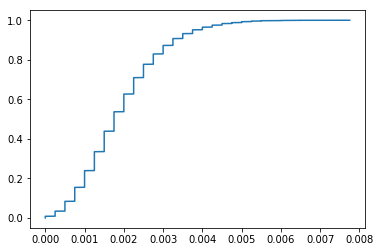

In [660]:
frE_ind_sorted = sorted(range(len(frE_mean)), key=lambda k: frE_mean[k])

ecdf_frE = ECDF(frE_mean)
# plt.plot(ecdf.x,ecdf.y)
plt.plot(ecdf_frE.x,ecdf_frE.y)

___